<a href="https://colab.research.google.com/github/minsaee/ai_chat_python/blob/master/607_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ai_chat_python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ai_chat_python


In [4]:
!pwd

/content/drive/MyDrive/ai_chat_python


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import datasets
boston = datasets.fetch_openml('boston')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
print(type(boston)) # <class 'sklearn.utils._bunch.Bunch'>
print(dir(boston))

<class 'sklearn.utils._bunch.Bunch'>
['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [8]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
print(bostonDF.head(2))
bostonDF['PRICE'] = boston.target
bostonDF.head(2)

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   

       B  LSTAT  
0  396.9   4.98  
1  396.9   9.14  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [9]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [10]:
# category type -> astype('int') 변환하기.
bostonDF['CHAS'] = bostonDF['CHAS'].astype('int')
bostonDF['RAD'] = bostonDF['RAD'].astype('int')
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율

각 컬럼별로 주택가격에 미치는 영향도를 조사

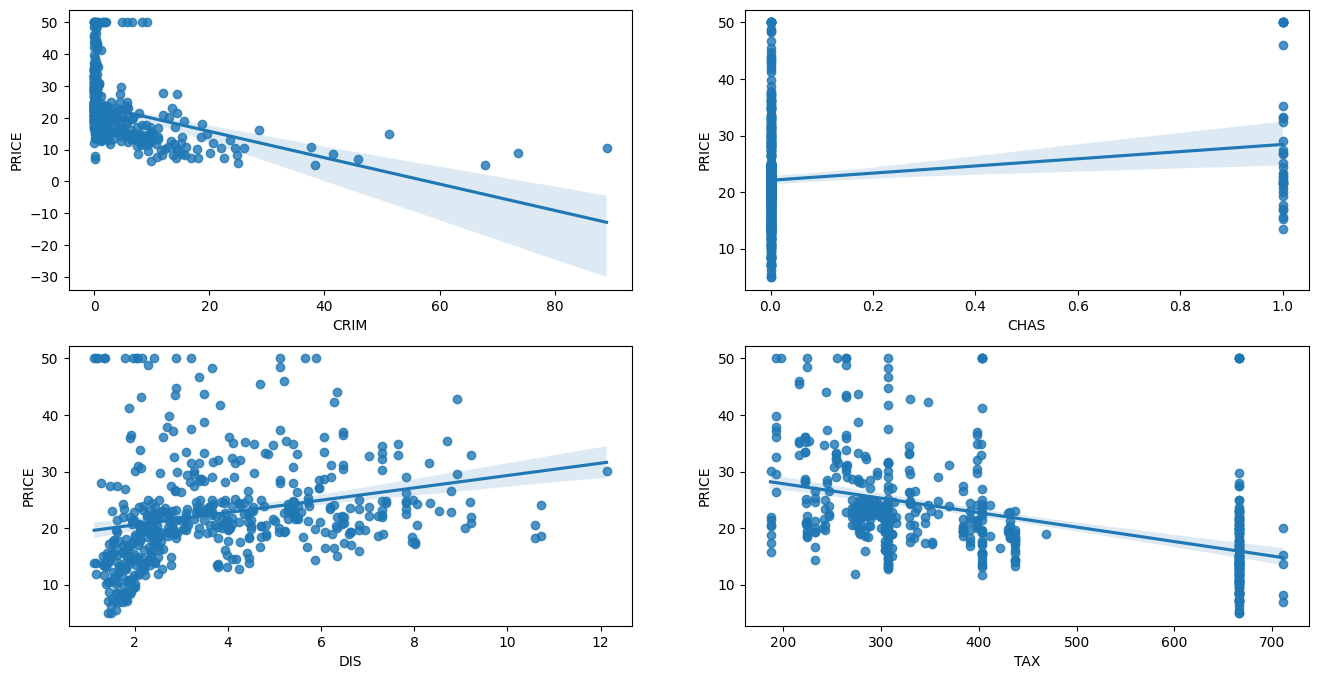

In [14]:
# 2개의 행과 2개의 열을가진 subplots를 이용, axs는 2*2의 ax
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=2)
lm_features_ = ['CRIM','CHAS', 'DIS', 'TAX']
for i, feature in enumerate(lm_features_):
  row = int(i/2)
  col = i%2
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

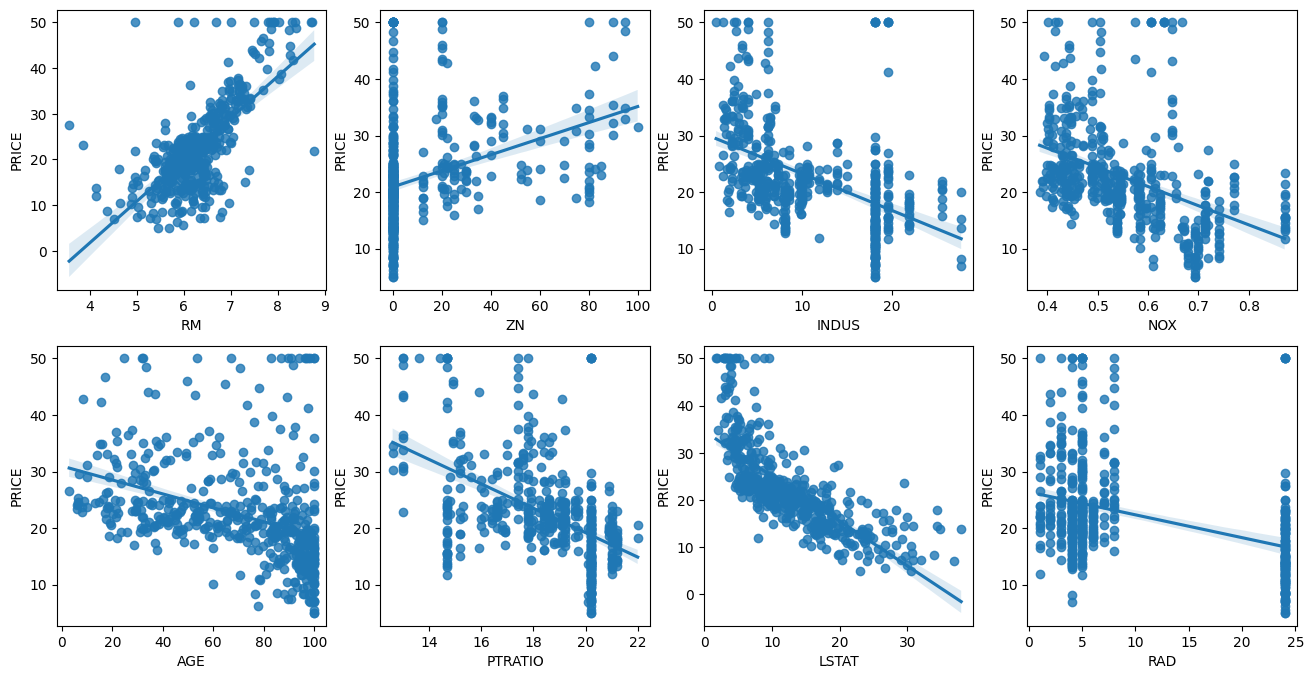

In [15]:
# 2개의 행과 4개의 열을가진 subplots를 이용, axs는 4*2의 ax
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

학습과 테스트 데이터 세트로 분리하고 학습/예측/평가수행

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split( bostonDF.iloc[:,:-1], bostonDF.iloc[:,-1], test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train) # 훈련할 데이터
y_preds = lr.predict(X_test)

# 평균제곱오차
mse = mean_squared_error(y_test, y_preds)
print('MSE: {0:.3f}'.format(mse))
# r2_score()는 0~1까지의 결과가 나올 수 있으며, 1에 가까울수록 상관관계가 높다는 뜻이다. -> 훈련이 잘되었다는 의미를 가진다.
# r2 : 결정계수
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds))) # r2_score(테스트 실제값, 테스트 예측값)

MSE: 17.297
r2_score : 0.757


In [17]:
# R^2
# Sum of square of Regression (회귀 제곱의 합)
SSR = np.sum(np.square(y_test - np.mean(y_test)))
print(SSR)

# Sum of square of errors (오차 제곱의 합)
SSE = np.sum(np.square(y_test - y_preds))
print(SSE)

R2 = 1- SSE/SSR
print(R2)

10829.55677631579
2629.131218001098
0.7572263323138948


In [18]:
# feature이 13개이므로 13개 출력
print('회귀계수값:', np.round(lr.coef_,1))

# 절편은 1의 결과를 출력함.
print('절편:', lr.intercept_)

회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]
절편: 40.995595172164826


In [19]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성
coeff = pd.Series(data = np.round(lr.coef_, 1), index=X_train.columns)
coeff.sort_values(ascending=False) # 오름차순

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [20]:
from sklearn.model_selection import cross_val_score
# cross_val_score()로 5 Fold set으로 MSE를 구한 후, 이를 기반으로 다시 RMSE를 구한다.
neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fold의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 fold의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 fold의 개별 RMSE : {0:.3f}'.format(avg_rmse))

5 fold의 개별 Negative MSE scores: [-37.03 -20.28 -37.55 -26.64 -15.49]
5 fold의 개별 RMSE scores: [6.09 4.5  6.13 5.16 3.94]
5 fold의 개별 RMSE : 5.162


In [21]:
print('r2_score : {0:.10f}'.format(r2_score(y_test, y_preds))) # r2_score(테스트 실제값, 테스트 예측값)

r2_score : 0.7572263323
